In [3]:
!pip3 install shap lime interpret keras tensorflow opencv-python explainerdashboard torch 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [81]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from interpret.glassbox import (LinearRegression,
                                LogisticRegression,
                                ClassificationTree,
                                ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from interpret.glassbox import ClassificationTree
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from interpret import show
import matplotlib.pyplot as plt
import seaborn as sns
import lime
from lime import lime_tabular
from sklearn.ensemble import RandomForestClassifier
import warnings  
warnings.filterwarnings("ignore")
from interpret.blackbox import LimeTabular
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import shap
import sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import seaborn as sns
from lime import lime_image
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D
import keras
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, InlineExplainer
np.random.seed(123) 
RANDOM_STATE = 42
import shap
shap.initjs()
from lime.lime_text import LimeTextExplainer
import transformers
print(transformers.__version__)
from transformers import AutoModelForSequenceClassification, AutoTokenizer, ZeroShotClassificationPipeline
import warnings
from sklearn.inspection import PartialDependenceDisplay
# Ignore all warnings
warnings.filterwarnings("ignore")

4.32.1




# Tutorial Outline
- Glassbox models
- Using LIME
- Using SHAP
- Using ExplainerDashboard 


In [9]:
def load_dataset():
  path = 'https://drive.google.com/uc?id={}'.format('1NQ5uuzEfLC-01B8JbEfgHsf8qUw7GIEu')
  df = pd.read_csv(path)
  # First, replace "?" with "Unknown"
  df.replace("?", "Unknown", inplace=True)
  # Drop columns with null values
  df = df.dropna(axis=1)
  return df

In [10]:
df = load_dataset()
df.head()

age      workclass     education marital_status    occupation   race  \
0   28        Private     Bachelors         Single  White-Collar  White   
1   30  Self-Employed         Assoc        Married  Professional  White   
2   32        Private  Some-college        Married  White-Collar  White   
3   20        Private  Some-college         Single       Service  White   
4   41  Self-Employed  Some-college        Married  White-Collar  White   

   gender  hours_per_week  income  
0  Female              60       0  
1    Male              65       1  
2    Male              50       0  
3  Female              35       0  
4    Male              50       0

In [11]:
# Create one hot encoding for specific columns
# categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'race', 'gender']
one_hot_categorical_data = pd.get_dummies(df[categorical_cols])
one_hot_categorical_data = one_hot_categorical_data.astype(int)

In [12]:
one_hot_categorical_data.head()

workclass_Government  workclass_Other/Unknown  workclass_Private  \
0                     0                        0                  1   
1                     0                        0                  0   
2                     0                        0                  1   
3                     0                        0                  1   
4                     0                        0                  0   

   workclass_Self-Employed  education_Assoc  education_Bachelors  \
0                        0                0                    1   
1                        1                1                    0   
2                        0                0                    0   
3                        0                0                    0   
4                        1                0                    0   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   

   education_Prof-school  education_School  education_Some-college  \
0                      0                 0                       0   
1                      0                 0                       0   
2                      0                 0                       1   
3                      0                 0                       1   
4                      0                 0                       1   

   marital_status_Divorced  marital_status_Married  marital_status_Separated  \
0                        0                       0                         0   
1                        0                       1                         0   
2                        0                       1                         0   
3                        0                       0                         0   
4                        0                       1                         0   

   marital_status_Single  marital_status_Widowed  occupation_Blue-Collar  \
0                      1                       0                       0   
1                      0                       0                       0   
2                      0                       0                       0   
3                      1                       0                       0   
4                      0                       0                       0   

   occupation_Other/Unknown  occupation_Professional  occupation_Sales  \
0                         0                        0                 0   
1                         0                        1                 0   
2                         0                        0                 0   
3                         0                        0                 0   
4                         0                        0                 0   

   occupation_Service  occupation_White-Collar  race_Other  race_White  \
0                   0                        1           0           1   
1                   0                        0           0           1   
2                   0                        1           0           1   
3                   1                        0           0           1   
4                   0                        1           0           1   

   gender_Female  gender_Male  
0              1            0  
1              0            1  
2              0            1  
3              1            0  
4              0            1

In [13]:
# Updated dataframe with the new encoded one hot encoded column values
df = pd.concat([one_hot_categorical_data, df], axis=1)
df.drop(categorical_cols, axis=1, inplace=True)

In [14]:
df.head()

workclass_Government  workclass_Other/Unknown  workclass_Private  \
0                     0                        0                  1   
1                     0                        0                  0   
2                     0                        0                  1   
3                     0                        0                  1   
4                     0                        0                  0   

   workclass_Self-Employed  education_Assoc  education_Bachelors  \
0                        0                0                    1   
1                        1                1                    0   
2                        0                0                    0   
3                        0                0                    0   
4                        1                0                    0   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   

   education_Prof-school  education_School  education_Some-college  \
0                      0                 0                       0   
1                      0                 0                       0   
2                      0                 0                       1   
3                      0                 0                       1   
4                      0                 0                       1   

   marital_status_Divorced  marital_status_Married  marital_status_Separated  \
0                        0                       0                         0   
1                        0                       1                         0   
2                        0                       1                         0   
3                        0                       0                         0   
4                        0                       1                         0   

   marital_status_Single  marital_status_Widowed  occupation_Blue-Collar  \
0                      1                       0                       0   
1                      0                       0                       0   
2                      0                       0                       0   
3                      1                       0                       0   
4                      0                       0                       0   

   occupation_Other/Unknown  occupation_Professional  occupation_Sales  \
0                         0                        0                 0   
1                         0                        1                 0   
2                         0                        0                 0   
3                         0                        0                 0   
4                         0                        0                 0   

   occupation_Service  occupation_White-Collar  race_Other  race_White  \
0                   0                        1           0           1   
1                   0                        0           0           1   
2                   0                        1           0           1   
3                   1                        0           0           1   
4                   0                        1           0           1   

   gender_Female  gender_Male  age  hours_per_week  income  
0              1            0   28              60       0  
1              0            1   30              65       1  
2              0            1   32              50       0  
3              1            0   20              35       0  
4              0            1   41              50       0

In [15]:
def get_data_split(df, test_size=0.20, random_state=2021):
    """
    Splits a DataFrame into training and test sets for features and target variable.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.
    - test_size (float): Proportion of the dataset to include in the test split.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - tuple: (X_train, X_test, y_train, y_test)
    """
    # Separate features and target variable from the DataFrame
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Perform the train-test split
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Example usage:
# X_train, X_test, y_train, y_test = get_data_split(my_dataframe)


In [16]:
# Split the training and testing data
X_train, X_test, y_train, y_test = get_data_split(df)
# X_train = X_train.replace({True: 1, False: 0})

In [46]:
# Initialize the Logistic Regression model
# random_state=2021: For reproducibility
# feature_names=X_train.columns.tolist(): To set feature names from training data
# penalty='l1': To specify L1 regularization, reduce overfitting
# solver='liblinear': The optimization algorithm to use for L1 regularization, find parameter values that minimize the cost function
log_reg_model = LogisticRegression(random_state=2021,
                                   feature_names=X_train.columns.tolist(),
                                   penalty='l1',
                                   solver='liblinear')

# Fit the Logistic Regression model to the training data
# X_train: Feature matrix for training
# y_train: Target variable for training
log_reg_model.fit(X_train, y_train)

In [47]:
# Using L1 Regularization and liblinear solver
# penalty='l1': Applies L1 regularization
# solver='liblinear': Algorithm optimized for small datasets and compatible with L1 regularization
l1_liblinear_model = LogisticRegression(random_state=2021, penalty='l1', solver='liblinear')
l1_liblinear_model.fit(X_train, y_train)  # Training the model

# Using L2 Regularization and lbfgs solver
# penalty='l2': Applies L2 regularization
# solver='lbfgs': Algorithm optimized for L2 regularization
l2_lbfgs_model = LogisticRegression(random_state=2021, penalty='l2', solver='lbfgs')
l2_lbfgs_model.fit(X_train, y_train)  # Training the model

# Using ElasticNet Regularization and saga solver
# penalty='elasticnet': Applies both L1 and L2 regularization
# l1_ratio=0.5: Sets the balance between L1 and L2 regularization
# solver='saga': Algorithm optimized for large datasets and all types of penalties
elasticNet_saga_model = LogisticRegression(random_state=2021, penalty='elasticnet', l1_ratio=0.5, solver='saga')
elasticNet_saga_model.fit(X_train, y_train)  # Training the model

# Using No Regularization and lbfgs solver
# penalty='none': No regularization is applied
# solver='lbfgs': Algorithm optimized for no penalty or L2 regularization
noReg_lbfgs_model = LogisticRegression(random_state=2021, penalty='none', solver='lbfgs')
noReg_lbfgs_model.fit(X_train, y_train)  # Training the model


In [48]:
# Make predictions on the training set
y_train_pred = log_reg_model.predict(X_train)

# Calculate and display some evaluation metrics for the training set
acc = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='weighted')  # micro, macro could also be used here.
recall = recall_score(y_train, y_train_pred, average='weighted')
f1 = f1_score(y_train, y_train_pred, average='weighted')

print(f"Model training is complete. Summary:")
print(f"  - Accuracy: {acc:.4f}") # Overall effectiveness of the model. 
print(f"  - Precision: {precision:.4f}") #  How many selected items are relevant?
print(f"  - Recall: {recall:.4f}") # How many relevant items are selected?
print(f"  - F1 Score: {f1:.4f}") # Balance between Precision and Recall.

Model training is complete. Summary:
  - Accuracy: 0.8256
  - Precision: 0.8150
  - Recall: 0.8256
  - F1 Score: 0.8166


In [49]:
# Make predictions on the test set
y_test_pred = log_reg_model.predict(X_test)

# Calculate and display evaluation metrics for the test set
acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Model evaluation on test data. Summary:")
print(f"  - Accuracy: {acc:.4f}")
print(f"  - Precision: {precision:.4f}")
print(f"  - Recall: {recall:.4f}")
print(f"  - F1 Score: {f1:.4f}")

auc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1]) # probabilities of the second classi
print("AUC: {:.3f}".format(auc))

Model evaluation on test data. Summary:
  - Accuracy: 0.8276
  - Precision: 0.8187
  - Recall: 0.8276
  - F1 Score: 0.8205
AUC: 0.877


In [50]:
# Generate local explanations for a subset of the test dataset
# using the logistic regression model. This helps in understanding
# how the model is making predictions for each individual instance
# within this subset.
local_explanation_lr = log_reg_model.explain_local(X_test.head(100), y_test.head(100), name='LR Model')

# Show the local explanations. This will visualize the contribution
# of each feature for each instance in the subset, aiding in a more
# detailed understanding of the model's behavior.
show(local_explanation_lr)


In [51]:
# Generate global explanations for the logistic regression model.
# This will provide an overview of how the model makes predictions
# across all instances, identifying feature importances and model
# behavior on a global scale.
global_explanation_lr = log_reg_model.explain_global(name='Global Explanation for LR Model')

# Display the global explanations. This will visualize the overall
# feature importances and other global insights into the model,
# helping in understanding its general behavior.
show(global_explanation_lr)

# Decision Tree
  

In [52]:
def train_decision_tree(X_train, y_train, random_state=42, max_depth=None, min_samples_split=2):
    """
    Initialize and train a Decision Tree Classifier model.

    Parameters:
        X_train: pd.DataFrame
            Feature matrix for the training data
        y_train: pd.Series
            Labels for the training data
        random_state: int, default=42
            The seed of the pseudo-random number generator
        max_depth: int, default=None
            The maximum depth of the tree
        min_samples_split: int, default=2
            The minimum number of samples required to split an internal node

    Returns:
        Trained Decision Tree Classifier model
    """
    dt = ClassificationTree(
        random_state=random_state,
        max_depth=max_depth,
        min_samples_split=min_samples_split
    )
    dt.fit(X_train, y_train)
    return dt


In [53]:
decision_tree = train_decision_tree(X_train, y_train, max_depth=5, min_samples_split=4)

AUC: 0.870
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3939
           1       0.68      0.57      0.62      1271

    accuracy                           0.83      5210
   macro avg       0.77      0.74      0.75      5210
weighted avg       0.82      0.83      0.82      5210



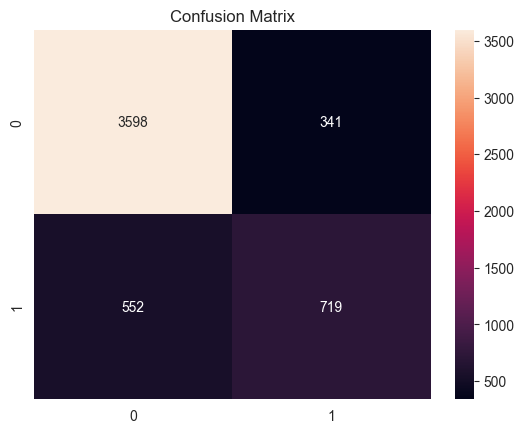

In [54]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the trained model on a test dataset using AUC, a classification report, and a confusion matrix.

    Parameters:
        model: Trained model object
            The trained classifier model
        X_test: pd.DataFrame
            Feature matrix for the test data
        y_test: pd.Series
            Labels for the test data

    Returns:
        None
    """
    # AUC
    predicted_probabilities = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, predicted_probabilities)
    print(f"AUC: {auc:.3f}")

    # Classification Report
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.show()

evaluate_model(decision_tree, X_test, y_test)


In [55]:
def interpret_model_globally(model):
    """
    Generate and display global explanations for the model.
    """
    global_explanation = model.explain_global(name='Global Explanation for Decision Tree')
    show(global_explanation)

interpret_model_globally(decision_tree)

In [56]:
def interpret_model_locally(model, X_test, y_test, num_instances=100):
    """
    Generate and display local explanations for a subset of test instances.
    """
    local_explanation = model.explain_local(X_test.head(num_instances), y_test.head(num_instances), name='Decision Tree Local')
    show(local_explanation)

interpret_model_locally(decision_tree, X_test, y_test)

# Explainable Boosting Machine

In [57]:
def train_ebc(X_train, y_train):
    """Trains an Explainable Boosting Classifier (EBC).
    
    Args:
        X_train (DataFrame): Training features.
        y_train (Series): Training target.
    
    Returns:
        ExplainableBoostingClassifier: The trained model.
    """
    model = ExplainableBoostingClassifier(random_state=2021)
    model.fit(X_train, y_train)
    return model

In [58]:
# Train model
ebc_model = train_ebc(X_train, y_train)

In [59]:
def evaluate_model(model, X_test, y_test):
    """Evaluates the model's performance.
    
    Args:
        model (ExplainableBoostingClassifier): The trained model.
        X_test (DataFrame): Testing features.
        y_test (Series): Testing target.
    
    Returns:
        str: Classification report as a string.
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy}")
    
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.show()
    
    return report

Model Accuracy: 0.83531669865643
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3939
           1       0.70      0.57      0.63      1271

    accuracy                           0.84      5210
   macro avg       0.78      0.74      0.76      5210
weighted avg       0.83      0.84      0.83      5210



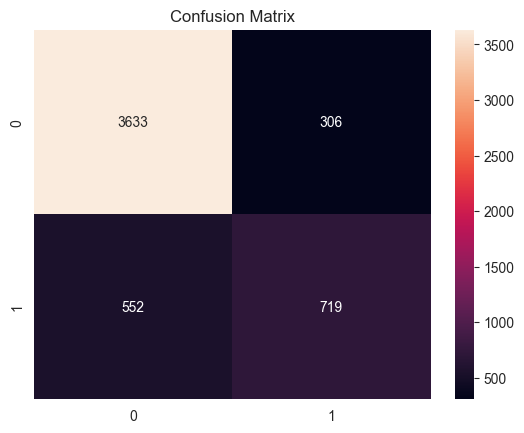

In [60]:
# Evaluate model
classification_rep = evaluate_model(ebc_model, X_test, y_test)

In [61]:
def generate_explanations(model, X_test, y_test):
    """Generates and displays local and global explanations for the model.
    
    Args:
        model (ExplainableBoostingClassifier): The trained model.
        X_test (DataFrame): Testing features.
        y_test (Series): Testing target.
    """
    # Local explanation for a subset of data
    local_explanation = model.explain_local(X_test[:5], y_test[:5], name='EBC Local')
    show(local_explanation)

    # Global explanation for the model
    global_explanation = model.explain_global(name='EBC Global')
    show(global_explanation)


In [62]:
# Generate explanations
generate_explanations(ebc_model, X_test, y_test)

# LIME 


In [63]:
def train_random_forest(X_train, y_train):
    """
    Train a Random Forest Classifier and return the trained model.
    """
    print("Training Random Forest Classifier...")
    rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=6)
    rf.fit(X_train, y_train)
    return rf

In [64]:
def plot_feature_importance(model, X_train):
    """
    Plot the feature importances of a trained model.
    
    Parameters:
        model: The trained machine learning model for which to plot feature importances.
        X_train: The training data used for the model, to retrieve feature names.
    """

    # Get the importance of each feature from the model
    feature_importance_values = model.feature_importances_
    
    # Sort the importance values in ascending order
    sorted_indices = np.argsort(feature_importance_values)
    
    # Retrieve the corresponding feature names
    feature_names = X_train.columns
    
    # Customize the plot style
    sns.set_style("whitegrid")
    
    # Create a horizontal bar plot using Seaborn
    plt.figure(figsize=(10, 8))
    sns.barplot(x=feature_importance_values[sorted_indices], 
                y=[feature_names[i] for i in sorted_indices],
                palette="viridis")
    
    # Add labels and title
    plt.xlabel('Relative Importance', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.title('Feature Importances in the Trained RF Model', fontsize=16)
    
    # Show the plot
    plt.show()

In [65]:
def evaluate_rf_model(rf, X_test, y_test):
    """
    Evaluate the model using various classification metrics and generate visual reports.
    Args:
        rf: The trained Random Forest model
        X_test: Test feature set
        y_test: Actual labels for the test set
    """
    print("Evaluating the model...")

    # Prediction and Probability Score
    y_pred = rf.predict(X_test)
    y_pred_proba = rf.predict_proba(X_test)[:, 1]

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # AUC-ROC Score
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC: {auc:.3f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr)
    plt.title(f'ROC Curve (AUC = {auc:.3f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [66]:
rf = train_random_forest(X_train, y_train)

Training Random Forest Classifier...


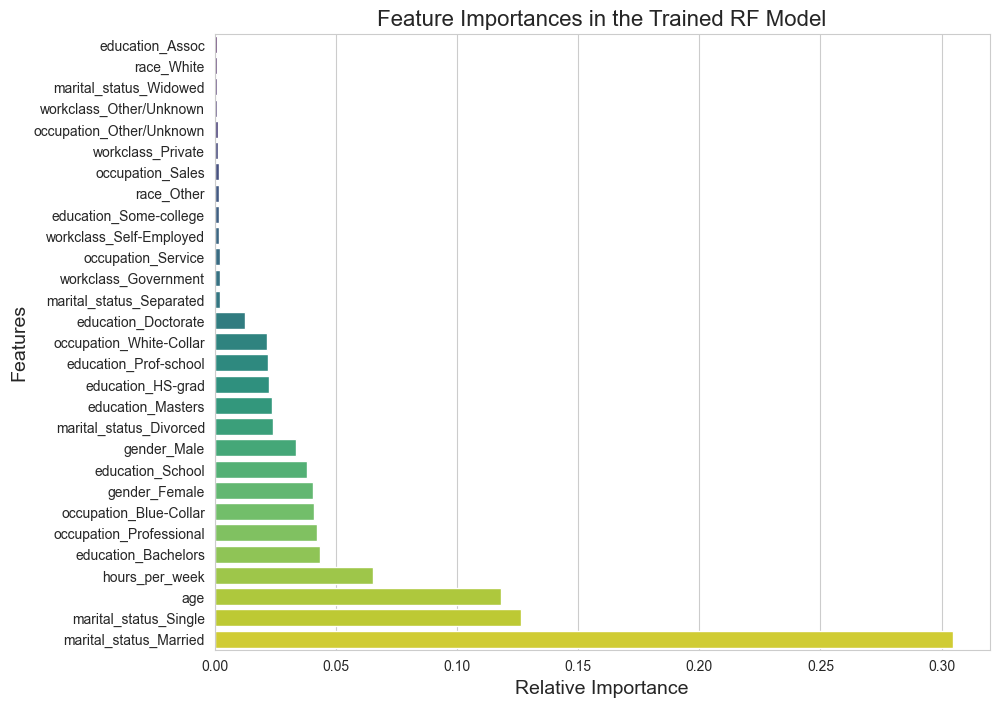

In [67]:
plot_feature_importance(rf, X_train)

Evaluating the model...
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3939
           1       0.75      0.47      0.57      1271

    accuracy                           0.83      5210
   macro avg       0.80      0.71      0.73      5210
weighted avg       0.82      0.83      0.82      5210

AUC-ROC: 0.882


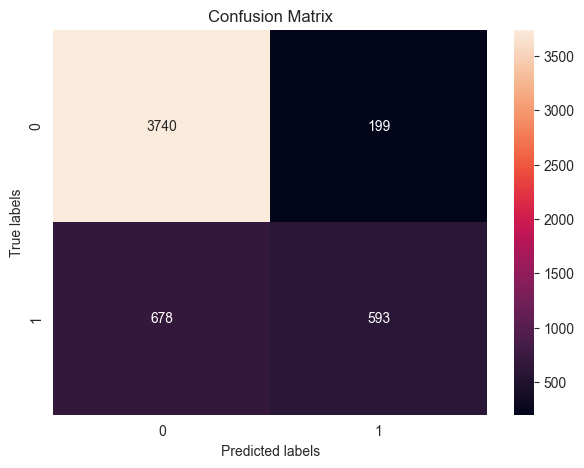

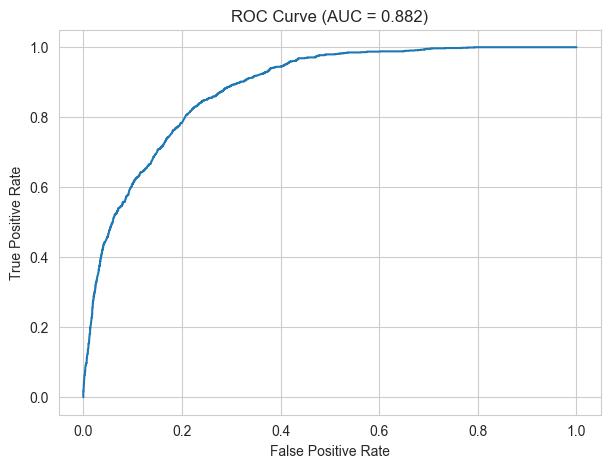

In [68]:
evaluate_rf_model(rf, X_test, y_test)

In [69]:
print("Interpreting the model using LIME...")

explainer = lime_tabular.LimeTabularExplainer(
    np.array(X_test.values),
    training_labels=np.array(y_test),
    feature_names=list(X_test.columns),
    class_names=['0', '1'],
    mode='classification',
    kernel_width=3,
    random_state=2023
)

i = 10 # Change this index to interpret other instances
exp = explainer.explain_instance(X_test.values[i], rf.predict_proba, num_features=10)
# Printing the graphical representation
exp.show_in_notebook()
# Prininting a list representation
print(exp.as_list())

Interpreting the model using LIME...


[('0.00 < marital_status_Married <= 1.00', 0.18448931109408226), ('education_Prof-school <= 0.00', -0.10859516099283452), ('education_Doctorate <= 0.00', -0.09060927240880844), ('marital_status_Single <= 0.00', 0.08404559481898184), ('education_Masters <= 0.00', -0.07710795532674154), ('occupation_Professional <= 0.00', -0.0695143509179482), ('hours_per_week <= 40.00', -0.060656079929034865), ('education_Bachelors > 0.00', 0.06028675057213211), ('education_School <= 0.00', 0.05677566641045797), ('age > 48.00', 0.043869414543693766)]


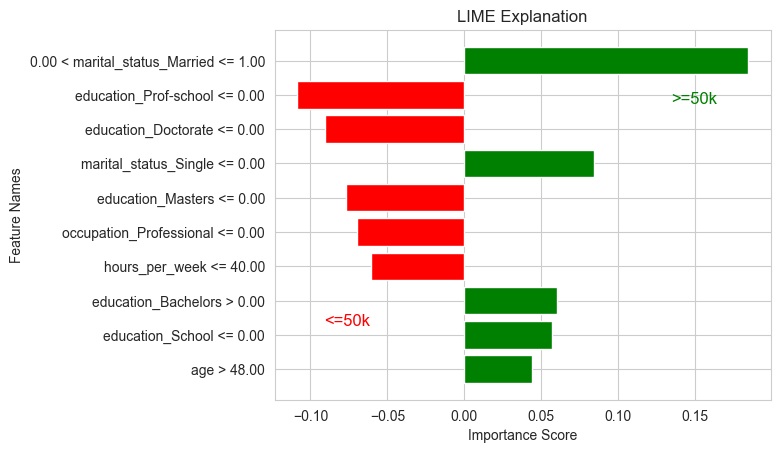

In [70]:
# Use the `as_pyplot_figure()` function to generate a plot from the explanation object
# This function returns a matplotlib figure, which can be used for additional customization.

# Generate the plot
fig = exp.as_pyplot_figure()

plt.title('LIME Explanation') 
plt.ylabel('Feature Names') 
plt.xlabel('Importance Score')  

# Add text annotations to explain parts of the plot 
plt.annotate('>=50k', xy=(0.8, 0.8), xycoords='axes fraction', fontsize=12, color='g')
plt.annotate('<=50k', xy=(0.1, 0.2), xycoords='axes fraction', fontsize=12, color='r')

# Show the plot
plt.show()

#### Using LimeTabular from InterpretML

In [71]:
# Multiple steps can be combined into a single pipeline and such a pipeline can be interpreted using LIME.
# Initialize PCA
# PCA (Principal Component Analysis) is a technique used for dimensionality reduction
# and feature extraction. It transforms the original variables into a new set of 
# variables that are orthogonal (uncorrelated), and reflect the maximum variance.
pca = PCA()

# Create a Pipeline
# A pipeline is a sequence of data processing steps that are applied in order.
# Here, we're using PCA for dimensionality reduction followed by Random Forest (rf)
# for classification.
# Each tuple ('pca', pca) and ('rf', rf) contains a name for the step and an instance of the transformer or estimator.
blackbox_model = Pipeline([
    ('pca', pca),  # First step: Apply PCA
    ('rf', rf)     # Second step: Apply Random Forest Classifier
])

# Fit the Pipeline model to the training data
# The pipeline applies PCA first, followed by Random Forest Classifier.
# Fitting involves both dimensionality reduction (PCA) and model training (Random Forest).
blackbox_model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA()),
                ('rf', RandomForestClassifier(max_depth=6, random_state=42))])

In [72]:
lime = LimeTabular(blackbox_model, X_train)
show(lime.explain_local(X_test[:50], y_test[:50]), 0)

### Text classification with LIME

In [73]:
def fetch_and_prepare_data():
    """
    Fetch and prepare the training and test data for text classification.
    """
    categories = ['alt.atheism', 'soc.religion.christian']
    train_data = fetch_20newsgroups(subset='train', categories=categories)
    test_data = fetch_20newsgroups(subset='test', categories=categories)
    return train_data, test_data

In [74]:
def vectorize_text_data(train_data, test_data):
    """
    Convert text data to numerical format using TF-IDF Vectorization.
    """
    tfidf_vectorizer = TfidfVectorizer(lowercase=False)
    train_vectors = tfidf_vectorizer.fit_transform(train_data.data)
    test_vectors = tfidf_vectorizer.transform(test_data.data)
    return tfidf_vectorizer, train_vectors, test_vectors

In [75]:
def train_text_random_forest(train_vectors, target_labels):
    """
    Train a Random Forest Classifier.
    """
    random_forest_model = RandomForestClassifier(n_estimators=500)
    random_forest_model.fit(train_vectors, target_labels)
    return random_forest_model

In [76]:
def evaluate_text_model(model, test_vectors, true_labels):
    """
    Evaluate the model with a comprehensive report.
    
    Parameters:
        model: Trained model
        test_vectors: Vectorized test features
        true_labels: Actual labels of test data
    
    Returns:
        None
    """
    # Predict the labels
    predicted_labels = model.predict(test_vectors)
    
    # Calculate and print the Accuracy
    acc = accuracy_score(true_labels, predicted_labels)
    print(f"Accuracy: {acc:.3f}")
    
    # Calculate and print the F1 Score
    f1 = f1_score(true_labels, predicted_labels, average='binary')
    print(f"F1 Score: {f1:.3f}")
    
    # Generate Classification Report
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels, target_names=['atheism', 'christian']))
    
    # Generate Confusion Matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    
    # Plot Confusion Matrix using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d",
                xticklabels=['atheism', 'christian'], yticklabels=['atheism', 'christian'])
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title('Confusion Matrix')
    plt.show()


In [82]:
def lime_explain_text(model, vectorizer, test_data, test_vectors, idx=10):
    """
    Explain a prediction using Lime.
    """
    class_names = ['atheism', 'christian']
    explainer = LimeTextExplainer(class_names=class_names)

    pipeline_model = make_pipeline(vectorizer, model)
    explanation = explainer.explain_instance(
        test_data.data[idx], pipeline_model.predict_proba, num_features=6)
    
    print(f"Document id: {idx}")
    print(f"Probability(christian) = {pipeline_model.predict_proba([test_data.data[idx]])[0, 1]}")
    print(f"True class: {class_names[test_data.target[idx]]}")

    return explanation

Accuracy: 0.905
F1 Score: 0.921

Classification Report:
              precision    recall  f1-score   support

     atheism       0.99      0.79      0.88       319
   christian       0.86      0.99      0.92       398

    accuracy                           0.91       717
   macro avg       0.92      0.89      0.90       717
weighted avg       0.92      0.91      0.90       717



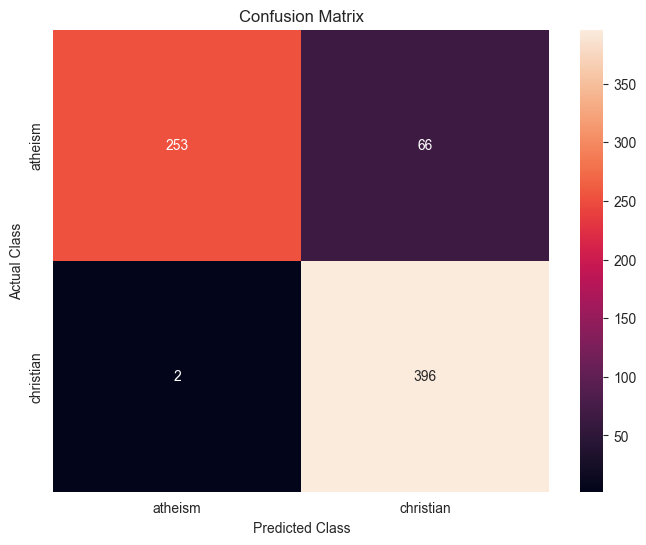

Document id: 10
Probability(christian) = 0.898
True class: christian


In [83]:
# Fetch and prepare data
train_data_text, test_data_text = fetch_and_prepare_data()

# Convert text to numerical format
tfidf_vectorizer_text, train_vectors_text, test_vectors_text = vectorize_text_data(train_data_text, test_data_text)

# Train the Random Forest Classifier
rf_model_text = train_text_random_forest(train_vectors_text, train_data_text.target)

# Evaluate the Model
evaluate_text_model(rf_model_text, test_vectors_text, test_data_text.target)

# Explain a prediction using Lime
explanation_text = lime_explain_text(rf_model_text, tfidf_vectorizer_text, test_data_text, test_vectors_text)

# Display the explanation
explanation_text.show_in_notebook(text=True)

### Image Classification with Lime

In [ ]:
def initialize_inception_model():
    """
    Initializes and returns the InceptionV3 model.
    """
    return inc_net.InceptionV3()

In [ ]:
def preprocess_image(image_paths):
    """
    Preprocesses the image for model prediction.
    
    Args:
        image_paths (list): List of image paths.
        
    Returns:
        np.ndarray: Preprocessed images ready for model prediction.
    """
    
    # Initialize an empty list to collect the preprocessed images
    preprocessed_images = []
    
    # Loop through each image path in the list
    for img_path in image_paths:
        
        # Load image and resize it to the target dimensions (299x299 for InceptionV3)
        img = image.load_img(img_path, target_size=(299, 299))
        
        # Convert the image to a numerical array
        img_array = image.img_to_array(img)
        
        # Expand dimensions of the image array to fit the input shape of the model
        img_array_expanded_dims = np.expand_dims(img_array, axis=0)
        
        # Preprocess the image using InceptionV3's preprocessing function
        preprocessed_img = inc_net.preprocess_input(img_array_expanded_dims)
        
        # Append the preprocessed image to the list
        preprocessed_images.append(preprocessed_img)
    
    # Stack all preprocessed images vertically and return
    return np.vstack(preprocessed_images)

In [ ]:
import cv2

def image_insights(image_path):
    """
    Provides insights about the given image.
    Args:
        image_path (str): Path to the image.
    """
    # Read image using OpenCV
    img = cv2.imread(image_path)

    # Get image shape
    height, width, channels = img.shape

    # Display insights
    print(f"---- Image Insights for {image_path} ----")
    print(f"Height: {height} pixels")
    print(f"Width: {width} pixels")
    print(f"Channels: {channels}")

    # Show image
    plt.figure(figsize=(8, 8))
    sns.set_style("white")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Input Image')
    plt.show()


In [ ]:
def generate_predictions(model, processed_images):
    """
    Generates model predictions for preprocessed images.
    Args:
        model (keras Model): Initialized model.
        processed_images (np.ndarray): Preprocessed images.
    Returns:
        np.ndarray: Model predictions.
    """
    return model.predict(processed_images)

In [ ]:
def generate_explanations_lime(model, processed_images):
    """
    Generates LIME explanations for the given model predictions on preprocessed images.
    
    Args:
        model (keras Model): The pre-trained deep learning model for which we are generating explanations.
        processed_images (np.ndarray): The set of images that have been preprocessed and are ready for model prediction.
        
    Returns:
        Explanation: LIME explanation object which can be further queried to understand model decisions.
    """
    
    # Initialize the LIME image explainer
    lime_image_explainer = lime_image.LimeImageExplainer()
    
    # Generate LIME explanation for the first preprocessed image.
    # We're using the predict function from the model and generating explanations for the top 5 predicted labels.
    # 'hide_color' is set to 0 and 'num_samples' is set to 1000 for a more robust explanation.
    explanations = lime_image_explainer.explain_instance(
        processed_images[0].astype('double'),  # the first image from the preprocessed images, converted to 'double'
        model.predict,                          # the prediction function from the Keras model
        top_labels=5,                           # number of top predicted labels to explain
        hide_color=0,                           # the color for a superpixel turned OFF
        num_samples=1000                        # the number of perturbed samples to use for the explanation
    )
    
    # Return the generated explanations
    return explanations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

def visualize_and_report(explanations):
    """
    Visualizes and reports the LIME explanations for a model's prediction on an image.
    
    Args:
        explanations (Explanation): LIME explanation object generated for the model's prediction.
    """
    
    # Obtain the image and mask for visualization based on the explanation object.
    # We are focusing on the label with the highest prediction probability (explanations.top_labels[0]).
    # Only the 'positive' features (those that support the model's decision) are shown (positive_only=True),
    # and we are limiting the visualization to the top 5 features (num_features=5).
    temp, mask = explanations.get_image_and_mask(
        explanations.top_labels[0],    # The label with the highest probability
        positive_only=True,            # Only show superpixels that contribute positively to the prediction
        num_features=5,                # Number of most important features to show
        hide_rest=True                 # Hide the rest of the image to focus on the important features
    )
    
    # Create a plot for visualization
    plt.figure(figsize=(8, 8))  # Set figure size
    sns.set_style("white")       # Set Seaborn style to white for better visibility
    
    # Display the image. The mask highlights the 'positive' features.
    # We normalize the pixel values of the image for display purposes.
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    
    # Hide axis
    plt.axis('off')
    
    # Add title to the plot
    plt.title('LIME Explanations')
    
    # Show the plot
    plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
import numpy as np

def additional_visualizations_and_heatmap(explanations):
    """
    Generates additional visualizations and a heatmap to better understand the features
    contributing to model predictions based on LIME explanations.
    
    Args:
        explanations (Explanation): LIME explanation object generated for the model's prediction.
    """
    
    # First additional visualization
    # Here, 'positive_only=True' but 'hide_rest=False'. 
    # This means we'll see the entire image but only positive contributing features will be highlighted.
    temp, mask = explanations.get_image_and_mask(
        explanations.top_labels[0], positive_only=True, num_features=5, hide_rest=False
    )
    plt.figure(figsize=(8, 8))
    sns.set_style("white")
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.axis('off')
    plt.title('Additional LIME Explanation 1')
    plt.show()

    # Second additional visualization
    # Now, 'positive_only=False' and 'num_features=10'.
    # This will show both positive and negative contributing features, up to 10 features.
    temp, mask = explanations.get_image_and_mask(
        explanations.top_labels[0], positive_only=False, num_features=10, hide_rest=False
    )
    plt.figure(figsize=(8, 8))
    sns.set_style("white")
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.axis('off')
    plt.title('Additional LIME Explanation 2')
    plt.show()

    # Generating the Heatmap
    # Here, we create a heatmap to understand the contribution of each superpixel in the decision making.
    ind = explanations.top_labels[0]  # Get the class with the highest predicted probability.
    dict_heatmap = dict(explanations.local_exp[ind])  # Local explanations for that class
    heatmap = np.vectorize(dict_heatmap.get)(explanations.segments)  # Create heatmap
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(heatmap, cmap='RdBu', center=0)  # Use Red-Blue colormap centered at 0
    plt.title('LIME Heatmap')
    plt.axis('off')
    plt.show()



In [ ]:
print(f"Notebook run using keras: {keras.__version__}")

# Get insights about the input image
image_insights(os.path.join('', 'dog.jpg'))

inception_model = initialize_inception_model()
processed_images = preprocess_image([os.path.join('','dog.jpg')])
predictions = generate_predictions(inception_model, processed_images)

decoded_predictions = decode_predictions(predictions)
for pred in decoded_predictions[0]:
    print(f"Class: {pred[1]}, Probability: {pred[2]}")

explanations = generate_explanations_lime(inception_model, processed_images)
visualize_and_report(explanations)

In [ ]:
additional_visualizations_and_heatmap(explanations)

# <b><em>SHAP - SHapley Additive exPlanations</em></b>

In [ ]:
# Using the previously trained Random Forest model
evaluate_rf_model(rf, X_test, y_test)
plot_feature_importance(rf, X_train)

In [ ]:
rf_shap_explainer = shap.TreeExplainer(model = rf)

In [ ]:
rf_shap_values = rf_shap_explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(rf_shap_values, X_test, feature_names=list(X_test.columns), max_display=10)

In [ ]:
shap.summary_plot(rf_shap_values[0], X_test, feature_names=list(X_test.columns), max_display=20)

In [ ]:
shap.summary_plot(rf_shap_values[1], X_test, feature_names=list(X_test.columns), max_display=20)

In [ ]:
# Set the start and end indices for SHAP value calculation
start_index = 9
end_index = 10

# Compute SHAP values for the test data between start_index and end_index
a_shap_values = rf_shap_explainer.shap_values(X_test[start_index:end_index])

# Print the shape of the SHAP values for the first class (usually class "0")
print("Shape of SHAP values:", a_shap_values[0].shape)

# Show the SHAP values
print("SHAP Values:", a_shap_values)

# Make a prediction for the test data between start_index and end_index
prediction = rf.predict(X_test[start_index:end_index])[0]

# Print the prediction made by the Random Forest model
print(f"The Random Forest model predicted: {prediction}")

# Generate a SHAP force plot for the test data between start_index and end_index
shap.force_plot(
    rf_shap_explainer.expected_value[0],  # Base value (expected value for the model)
    a_shap_values[0],  # SHAP values for the 10th observation
    X_test[start_index:end_index]  # Feature values for the test data between start_index and end_index
)


In [ ]:
rf_shap_explanation = shap.Explanation(
    values=rf_shap_values[0][9,:],  # For class 10
    base_values=rf_shap_explainer.expected_value[0],
    data=X_test.iloc[9,:],  # Your test dataset
    feature_names=list(X_test.columns)  # Features' names
)

In [ ]:
shap.plots.waterfall(rf_shap_explanation)

### Shap with a simple MLP


In [ ]:
def train_mlp_model(X_train, y_train):
    """
    Train a Multi-Layer Perceptron model.
    
    Parameters:
        X_train (pd.DataFrame): Training features.
        y_train (pd.DataFrame): Training labels.
        
    Returns:
        trained_mlp_model: Trained MLP model with pipeline.
    """
    trained_mlp_model = make_pipeline(
        StandardScaler(),
        MLPClassifier(hidden_layer_sizes=(5,),
                      activation='logistic',
                      max_iter=10000,
                      learning_rate='invscaling',
                      random_state=0)
    )
    trained_mlp_model.fit(X_train.values, y_train.values)
    return trained_mlp_model


In [ ]:
def evaluate_mlp_model(trained_model, X_test, y_test):
    """
    Evaluate the trained MLP model.
    
    Parameters:
        trained_model: Trained MLP model.
        X_test (pd.DataFrame): Testing features.
        y_test (pd.DataFrame): Testing labels.
        
    Returns:
        mlp_accuracy (float): Accuracy of the MLP model on test data.
    """
    y_pred = trained_model.predict(X_test.values)
    mlp_accuracy = accuracy_score(y_test, y_pred)
    print(f"MLP Model Accuracy: {mlp_accuracy}")
    return mlp_accuracy

In [ ]:
def generate_shap_kernel_explainer(trained_model, X_train):
    """
    Generate a SHAP Kernel Explainer.
    
    Parameters:
        trained_model: Trained MLP model.
        X_train (pd.DataFrame): Training features.
        
    Returns:
        kernel_explainer: Initialized SHAP Kernel Explainer.
    """
    def model_prediction_function(data):
        return trained_model.predict(data)

    # Sample data for background distribution
    shap_sample_data = shap.sample(X_train, 100)

    # Create Kernel Explainer
    kernel_explainer = shap.KernelExplainer(model_prediction_function, shap_sample_data)
    
    return kernel_explainer


In [ ]:
def generate_shap_values_and_plot(kernel_explainer, X_test):
    """
    Generate SHAP values and Summary plot.
    
    Parameters:
        kernel_explainer: Initialized SHAP Kernel Explainer.
        X_test (pd.DataFrame): Testing features.
    """
    shap_values = kernel_explainer.shap_values(X_test, nsamples=100)
    shap.summary_plot(shap_values, X_test, feature_names=list(X_test.columns), max_display=20)


In [ ]:
trained_mlp_model = train_mlp_model(X_train, y_train)
mlp_accuracy = evaluate_mlp_model(trained_mlp_model, X_test, y_test)
shap_kernel_explainer = generate_shap_kernel_explainer(trained_mlp_model, X_train)
generate_shap_values_and_plot(shap_kernel_explainer, X_test)

### SHAP for GradientExplainer for CNN

In [ ]:
def load_and_preprocess_mnist_data():
    """
    Load and preprocess the MNIST dataset
    Returns:
        tuple: containing preprocessed training and test data
    """
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0

    # Reshape images to 4D arrays
    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
    test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

    return train_images, train_labels, test_images, test_labels

In [ ]:
def build_cnn_model():
    """
    Build and compile a Convolutional Neural Network (CNN) model for image classification.
    
    Returns:
        tf.keras.Model: Compiled CNN model with specified layers and architecture.
    """
    
    # Define the first input layer for grayscale images (shape: 28x28 pixels with 1 channel)
    input_layer1 = tf.keras.layers.Input(shape=(28, 28, 1))
    
    # Define the second input layer for grayscale images (shape: 28x28 pixels with 1 channel)
    input_layer2 = tf.keras.layers.Input(shape=(28, 28, 1))
    
    # Add a 2D Convolutional layer with 32 filters, kernel size of 3x3, and RELU activation
    conv_layer = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer2)
    
    # Concatenate flattened versions of the first input layer and the convolutional layer
    concatenated_layer = tf.keras.layers.concatenate([tf.keras.layers.Flatten()(input_layer1), 
                                                      tf.keras.layers.Flatten()(conv_layer)])
    
    # Add a dense hidden layer with 128 neurons and RELU activation
    hidden_layer = tf.keras.layers.Dense(128, activation='relu')(concatenated_layer)
    
    # Add a dropout layer for regularization (20% dropout rate)
    dropout_layer = tf.keras.layers.Dropout(0.2)(hidden_layer)
    
    # Add the output layer with 10 neurons (one for each class) using softmax activation
    output_layer = tf.keras.layers.Dense(10, activation='softmax')(dropout_layer)
    
    # Build the model
    cnn_model = tf.keras.models.Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
    
    # Compile the model with the Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric
    cnn_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    
    return cnn_model


In [ ]:
def evaluate_cnn_model_performance(model, train_images, train_labels):
    """
    Train and evaluate the model
    Args:
        model (tf.keras.Model): The model to be trained
        train_images (ndarray): Training images
        train_labels (ndarray): Training labels
    """
    model.fit([train_images, train_images], train_labels, epochs=1)


In [ ]:
def explain_cnn_with_shap(model, train_images, test_images):
    """
    Use SHAP's GradientExplainer to explain the model predictions
    Args:
        model (tf.keras.Model): The trained model
        train_images (ndarray): Training images
        test_images (ndarray): Test images
    """
    # Initialize SHAP's GradientExplainer
    gradient_explainer = shap.GradientExplainer(model, [train_images, train_images])

    # Get the SHAP values for a subset of the test images
    shap_values = gradient_explainer.shap_values([test_images[:10], test_images[:10]])

    return shap_values


In [ ]:
cnn_train_images, cnn_train_labels, cnn_test_images, cnn_test_labels = load_and_preprocess_mnist_data()
cnn_model = build_cnn_model()
evaluate_cnn_model_performance(cnn_model, cnn_train_images, cnn_train_labels)
cnn_shap_values = explain_cnn_with_shap(cnn_model, cnn_train_images, cnn_test_images)

In [ ]:
shap.image_plot([cnn_shap_values[i][0] for i in range(10)], cnn_test_images[:5])

### Transformers with SHAP

In [ ]:
transformer_model = transformers.pipeline('sentiment-analysis', return_all_scores=True)
transformers_text_data = "This tutorial is fun :p"
transformer_model(transformers_text_data)[0]

In [ ]:
transformer_explainer = shap.Explainer(transformer_model) 
transformer_shap_values = transformer_explainer([transformers_text_data])

In [ ]:
shap.force_plot(transformer_shap_values[0,:,'POSITIVE'])

In [ ]:
shap.plots.bar(transformer_shap_values[0,:,'POSITIVE'])

In [ ]:
transformer_test_data = "PyCon Taiwan is the best conference ever!"
transformer_model(transformer_test_data)[0]
transformer_new_shap_values = transformer_explainer([transformer_test_data])
shap.plots.text(transformer_new_shap_values[0,:,'POSITIVE'])
shap.plots.bar(transformer_new_shap_values[0,:,'POSITIVE'])

# Explainer Dashboard

In [ ]:
explainer_dash_y_pred = rf.predict_proba(X_test)[:, 1]
explainer_dash_y_pred

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
explainer_dashboard = ClassifierExplainer(rf, X_test, y_test)

In [ ]:
warnings.simplefilter("ignore")
ExplainerDashboard(explainer_dashboard).run()